In [1]:
import numpy as np
from astroML.correlation import two_point
np.random.seed(0)
X = np.random.random((5000, 2))
bins = np.linspace(0, 1, 20)
corr = two_point(X, bins)
np.allclose(corr, 0, atol=0.02)

True

In [3]:
import numpy as np
from astroML.correlation import bootstrap_two_point
corr, dcorr = bootstrap_two_point(X, bins, Nbootstrap = 5)
np.allclose(corr, 0, atol = 2 * dcorr)

True

### Angular Two-point Correlation Function

In [18]:
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Get data and do some quality cuts
data = fetch_sdss_specgals()
m_max = 17.7

# redshift and magnitude cuts
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]

# RA/DEC cuts
RAmin, RAmax = 140, 220
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax]
data = data[data['ra'] > RAmin]
data = data[data['dec'] < DECmax]
data = data[data['dec'] > DECmin]

ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

print("data size:")
print("  red gals: ", len(data_red))
print("  blue gals:", len(data_blue))


#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data_red, data_blue]:
        results += bootstrap_two_point_angular(D['ra'],
                                               D['dec'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps, b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$')
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')


plt.show()


data size:
  red gals:  38017
  blue gals: 16883
@pickle_results: using precomputed results from 'correlation_functions.pkl'


ValueError: not enough values to unpack (expected 7, got 4)

#### There is something wrong with the code in AstroML website

### Diagramatic Description of n-point correlations

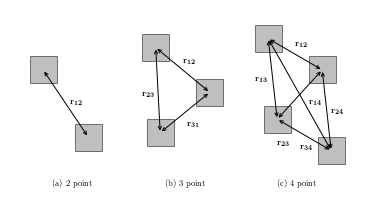

In [19]:
import itertools
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Set up plot
fig = plt.figure(figsize = (5, 2.8), facecolor = 'w')

rect_locs = [(0.5, 3.3), (1.5, 1.8),
             (3.0, 3.8), (4.2, 2.8), (3.1, 1.9),
             (5.5, 4.0), (6.7, 3.3), (5.7, 2.2), (6.9, 1.5)]

x_size = 0.6
y_size = 0.6

ax = fig.add_axes([0, 0, 1, 1], frameon = False, xticks = [], yticks = [])

for loc in rect_locs:
    ax.add_patch(Rectangle(loc, x_size, y_size,
                          fc = 'gray', ec='k', alpha = 0.5))
    
for indices in [(0, 1),
               (2, 3, 4),
               (5, 6, 7, 8)]:
    for pair in itertools.combinations(indices, 2):
        ax.annotate("", np.array(rect_locs[pair[0]]) + 0.5 * x_size,
                    np.array(rect_locs[pair[1]]) + 0.5 * y_size,
                    arrowprops=dict(arrowstyle='<->'))
        
ax.text(1.0, 1.0, "(a) 2 point")
ax.text(3.5, 1.0, "(b) 3 point")
ax.text(6.0, 1.0, "(c) 4 point")

ax.text(1.4, 2.8, '$\mathbf{r_{12}}$')

ax.text(3.9, 3.7, '$\mathbf{r_{12}}$')
ax.text(3.0, 3.0, '$\mathbf{r_{23}}$')
ax.text(4.0, 2.3, '$\mathbf{r_{31}}$')

ax.text(6.4, 4.1, '$\mathbf{r_{12}}$')
ax.text(5.5, 3.3, '$\mathbf{r_{13}}$')
ax.text(7.2, 2.6, '$\mathbf{r_{24}}$')
ax.text(6.7, 2.8, '$\mathbf{r_{14}}$')
ax.text(6.0, 1.9, '$\mathbf{r_{23}}$')
ax.text(6.5, 1.8, '$\mathbf{r_{34}}$')

ax.set_xlim(0, 8)
ax.set_ylim(0.5, 5)
plt.show()        